# LAB 4 - CCD CHARACTERIZATION

# Abstract

In this lab, the concepts of read noise, gain, and dark current are explored. Over two days, sets of bias, flat, and dark frames were taken using the Angell Hall Observatory 0.4m telescope. The flat frames were corrected by subtracting the bias frames, and the read noise of the telescope was then calculated using the corrected flat frames, found to be 19.45 ADU. The gain was calculated by plotting and curve-fitting the mean and variance of the sets of flat frames, found to be 0.4 e-/ADU, meaning that the read noise in e- was 7.79. The dark current was calculated using bias- and exposure-corrected dark frames at various temperatures. The dark current constant A was found to be 274.8 ADU/pixel/sec, and band gap energy Eg was found to be 0.805 eV, not terribly far from the known band gap energy of silicon, 1.1 eV. 

# Introduction

Charge-coupled devices (CCDs) are essential to modern astronomy. A CCD is a collection of capacitors that collect photons and convert them into electrons. Each capacitor represents one pixel, and the number of electrons per pixel is input into a computer and read into an image. CCDs have inherent properties that affect the data taken by them. One such property is the read noise, or the noise level from the CCD itself as measured in complete darkness and with minimum possible exposure time. Another property is the dark noise, which is the amount of signal in a dark frame taken in the darkness with an extended exposure time. This is dependent on the dark current, or the residual flow of electrons in a CCD when there is no source of light, which changes with temperature. The CCD in Angell Hall is very modern, meaning that it should have a very low dark current, but it is only cooled with a fan, which could provide comlpications.

In practice, the read noise is found using bias frames, taken in darkness and with minimum exposure time, and flat frames, taken at differing light levels with a certain exposure time (in this case, 1 second). The bias frames are subtracted from the flat frames, and from these corrected flat frames, the read noise can be determined. The dark noise and thus dark current can be found using dark frames, taken in darkness with an extended exposure time and at varying temperatures. 

Most CCDs are primarily made of silicon, and their method of photon detection depends on the bandgap structure of silicon. With the dark current data collected, an attempt can be made to fit the data to the exponential dark current function. One of the coefficients of the dark current equation is the bandgap energy of silicon, which is known to be 1.1 eV. In theory, the corresponding coefficient of the curve fitted to the data taken should be close to this value. 

# Theory

CCD noise follows a Poisson distribution, meaning that the mean should be equal to the variance. Noise is defined as the mean pixel values of bias-corrected frames. The read noise is defined as the standard deviation between bias frames. This means that it can can be measured by taking the average of the standard deviation between each pixel in a bias-corrected flat frame. Since the noise is Poissonian and standard deviation is just the square root of variance, the read noise is thus equal to the square root of the mean. The gain can be used as the conversion factor between noise in ADU and noise in e-. The read noise in ADU and in electrons is related to the gain by the following equations:

$$N_{ADU} = \frac{N_{e -}}{g} $$

$$\sigma^2 = N$$

$$\sigma_{e} = \sqrt{N_e} $$

$$\sigma_{ADU} = \frac{\sqrt{N_e}}{g}$$

$$\sigma_{e} = \sigma_{ADU} * g$$

Given that the noise is Poissonian, when plotting mean vs. variance in electrons of the corrected flat field images, the slope should be 1. If plotted in ADU, the slope should be equal to the inverse of the gain, as described in lecture.

$$ slope = \frac{1}{g} $$

$$ g = \frac{1}{slope} $$

The dark noise is defined as the mean pixel value of a bias-corrected dark frame, and can be measured as such. With the gain measured and the exposure time known, the dark noise measured in ADU can be accurately converted into dark current in e-/pixel/sec. 

$$ DC = \frac{N_{dark}*g}{t_{exp}} $$

Dark current can also be expressed by the following equation:

$$ DC = A * T^{3/2} * e^{\frac{-E_g}{2 k T}} $$

In which $A$ is a constant in ADU/pixel/sec, $E_g$ is the bandgap of silicon in eV, k is the boltzmann constant in eV/K, and T is the temperature in K. This equation will be used as a model to fit a curve to the dark current data measured and to describe the observed values of $A$ and $E_g$.

# Experiment and Methodology

First, the necessary libraries are imported. Matplotlib is used for plotting, scipy for a curve fitting function to optimize unknown variables, astropy for the importing and use of fits files, and numpy for mathematics.

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from astropy.io import fits
import numpy as np

### Part 1

The first day's data are imported. There are ten bias frames, and ten flats each at lamp brightness settings of 75, 190, and 255, all with an exposure time of 1 second. For each set of frames, a list is created, and a loop runs to import each consecutive file name and append it to that list. These lists are then converted to arrays for easier manipulation.

In [44]:
bias = []
for i in range(1,11):
    bias.append(fits.getdata("bias-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))

flat75 = []
for i in range(1,11):
    flat75.append(fits.getdata("flat75-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    
flat190 = []
for i in range(1,11):
    flat190.append(fits.getdata("flat190-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    
flat255 = []
for i in range(1,11):
    flat255.append(fits.getdata("flat255-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
    
bias = np.array(bias)
flat75 = np.array(flat75)
flat190 = np.array(flat190)
flat255 = np.array(flat255)

The readnoise is calculated in ADU. The standard deviation of each pixel is taken between the ten bias frames, and the mean of those standard devations is equal to the read noise in ADU.

In [31]:
readnoise = bias.std(axis=0).mean()

print("The read noise is", readnoise, "ADU")

The read noise is 19.4526825852 ADU


A single average bias frame is created, using the mean of each pixel value between the ten bias frames. This average bias frame is then subtracted from each individual flat frame in the three sets of flats. These bias-corrected sets of flat frames are written into three lists, which are then converted to arrays. 

In [46]:
averagebias = bias.mean(axis=0)

flat75_sub_bias = [i - averagebias for i in flat75]
flat190_sub_bias = [i - averagebias for i in flat190]
flat255_sub_bias = [i - averagebias for i in flat255]

flat75_sub_bias = np.array(flat75_sub_bias)
flat190_sub_bias = np.array(flat190_sub_bias)
flat255_sub_bias = np.array(flat255_sub_bias)

To get the mean pixel value of each set of flats, the mean of each pixel across the array is taken, essentially creating an average flat frame for each set of flats. The mean pixel value of these average flats can then be taken from these average flat frames. A similar process is used to get the variance of each set of flats. The variance of each pixel is taken across each set of flats, creating an array of average variance for each pixel. The mean of this array is then taken, giving a single average variance value for each set of flats. These average mean and variance values are then placed into lists, which are converted to arrays. They are then plotted against each other.

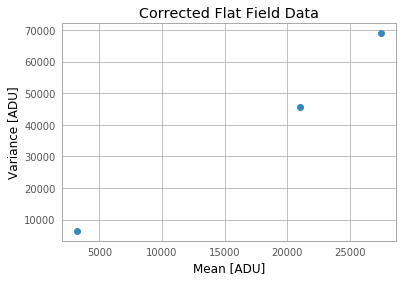

This plot shows the average mean and variance values for the three sets of flat frames at lamp brightness levels 75, 190, and 255.


In [86]:
mean75 = flat75_sub_bias.mean(axis=0).mean()
mean190 = flat190_sub_bias.mean(axis=0).mean()
mean255 = flat255_sub_bias.mean(axis=0).mean()

var75 = (flat75_sub_bias.var(axis=0)).mean()
var190 = (flat190_sub_bias.var(axis=0)).mean()
var255 = (flat255_sub_bias.var(axis=0)).mean()

mcf = [mean75,mean190,mean255]
vcf = [var75,var190,var255]

mcf = np.array(mcf)
vcf = np.array(vcf)

plt.scatter(mcf,vcf)
plt.title("Corrected Flat Field Data")
plt.xlabel("Mean [ADU]")
plt.ylabel("Variance [ADU]")
plt.show()

print("This plot shows the average mean and variance values for the",
      "three sets of flat frames at lamp brightness levels 75, 190, and 255.")

Now, the process of calculating the gain can begin. Gain can be defined as the slope of the mean vs. variance plot. An estimate for the slope can be calculated using the difference between the maximum and minimum mean and variance values.

In [57]:
rise = vcf[2] - vcf[0]
run = mcf[2] - mcf[0]
slope_est = rise/run

Curve fitting can be used to optimize the estimate for the slope of the mean vs. variance line. A function is defined to describe the line wanted; a linear function with variables m = slope, x = data input, and b = y-intercept. Initial estimates for the m and b variables are defined, the m-estimate being the estimated slope, and the b-estimate being a guess at the y-intercept. The function with estimated parameters is then plotted alongside the original data.

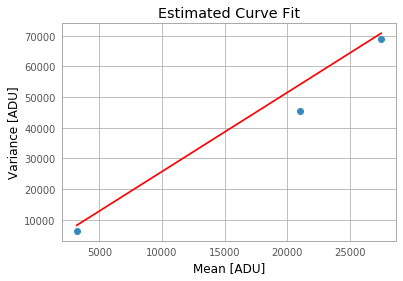

This plot shows the average mean and variance values for the three sets of flat frames at lamp brightness levels 75, 190, and 255 alongside an estimated curve-fit line.


In [87]:
def func(x,m,b):
    return m*x + b

m0 = slope_est
b0 = 0

plt.scatter(mcf,vcf)
plt.title("Estimated Curve Fit")
plt.xlabel("Mean [ADU]")
plt.ylabel("Variance [ADU]")
plt.plot(mcf,func(mcf,m0,b0),'r')
plt.show()

print("This plot shows the average mean and variance values for the",
      "three sets of flat frames at lamp brightness levels 75, 190, and 255",
     "alongside an estimated curve-fit line.")

Now, the actual curve-fit function from scipy comes into play. The optimized coefficients m and b are represented by "coeffs", and "fiterr" represents the error in each of these optimized values. The coefficients and fit error and are calculated with the curve_fit function applied to our linear function defined above, using the mean and variance data and previously estimated coefficients. The curve-fit line is plotted against the original data once again, this time with optimized coefficients. The error in each variable is printed, defined as the square root of the respective values provided by curve_fit in fiterr.

m=2.49508387146, b=-2695.30457908
Error in m = 0.29720343249
Error in b = 5964.52636119


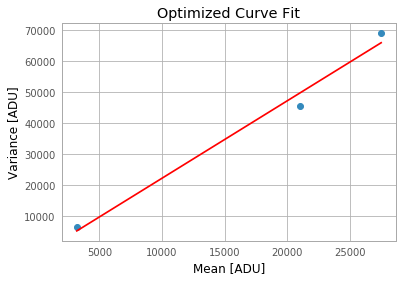

This plot shows the average mean and variance values for the three sets of flat frames at lamp brightness levels 75, 190, and 255 alongside an optimized curve-fit line.


In [88]:
coeffs, fiterr = curve_fit(func, mcf, vcf, p0=(m0,b0))

print ("m=%s, b=%s" % (coeffs[0], coeffs[1]))
m_error = np.sqrt(fiterr[0][0])
b_error = np.sqrt(fiterr[1][1])
print("Error in m =",m_error)
print("Error in b =",b_error)

plt.scatter(mcf,vcf)
plt.plot(mcf,func(mcf,*coeffs),'r')
plt.title("Optimized Curve Fit")
plt.xlabel("Mean [ADU]")
plt.ylabel("Variance [ADU]")
plt.show()

print("This plot shows the average mean and variance values for the",
      "three sets of flat frames at lamp brightness levels 75, 190, and 255",
     "alongside an optimized curve-fit line.")

With the optimized coefficients -- particularly the slope, m -- the gain can now be accurately calculated. With this gain value, the readnoise in ADU can be converted to electrons. 

In [70]:
gain = 1/coeffs[0]  #1/slope
print("The gain is",gain, "e-/ADU")

readnoise_e = readnoise * gain  #ADU * e-/ADU
print("The readnoise is",readnoise_e, "electrons")

The gain is 0.400788130386 e-/ADU
The readnoise is 7.79640428434 electrons


### Part 2

The second day's data are imported. There are thirty bias frames total. A list is created and a loop runs to import each consecutive file name and append it to that list. The list is then converted into an array of bias frames. Then, each dark frame is imported separately into individual variables, as the naming conventions are not standardized in a way in which the files could be imported by loop. The maximum ambient temperature that the CCD could reach was found to be 9.4 C on the day the data was taken. Any lower temperatures were set by the observing program and created using a fan pointed at the CCD. The temperatures measured range from 4.6 C to 9.4 C. The exposure times vary between each dark frame, with a range of 300 seconds to 900 seconds. 

In [73]:
bias2 = []
for i in range(1,31):
    bias2.append(fits.getdata("Bias_Day_2-"+"0"*(4-len(str(i)))+str(i)+".fit", ext=0).astype(np.int))
bias2 = np.array(bias2)

DT6E600 = fits.getdata("DarkT6exp600-0001.fit", ext=0).astype(np.int)
DT9E600 = fits.getdata("DarkT9exp600-0001.fit", ext=0).astype(np.int)
DT6E900 = fits.getdata("GroupAADark_Day_2_6cexp900-0001.fit", ext=0).astype(np.int)
DT9E300 = fits.getdata("GroupAADark_Day_2_9cexp300-0001.fit", ext=0).astype(np.int)
DT4_6E450 = fits.getdata("GroupADarkT4.6Exp450.fit", ext=0).astype(np.int)
DT8_9E300 = fits.getdata("GroupADarkT8.9Exp300.fit", ext=0).astype(np.int)
DT7E400 = fits.getdata("GroupBBDarkT7Exp400.fit", ext=0).astype(np.int)
DT8E400 = fits.getdata("GroupBBDarkT8Exp400.fit", ext=0).astype(np.int)
DT6E300 = fits.getdata("GroupBDarkT6Exp300.fit", ext=0).astype(np.int)
DT9E600_2 = fits.getdata("GroupBDarkT9Exp600.fit", ext=0).astype(np.int)
DT7_1E600 = fits.getdata("GroupCDarkT7.1Exp400.fit", ext=0).astype(np.int)
DT9_4E400 = fits.getdata("GroupCDarkT9.4Exp300.fit", ext=0).astype(np.int)
DT7E600 = fits.getdata("GroupDDarkT7Exp600.fit", ext=0).astype(np.int)
DT9_4E300 = fits.getdata("GroupDDarkT9.4Exp300.fit", ext=0).astype(np.int)

An average bias frame is created by taking the mean of each pixel value between the thirty bias frames. This average bias frame is then subtracted from each dark frame. 

In [74]:
avbias2 = bias2.mean(axis=0)

#dark noise below!
DT4_6E450_sb_exp = (DT4_6E450 - avbias2)  #ignore "_exp" -- originally included divison by exposure time but that got moved elsewhere
DT6E300_sb_exp = (DT6E300 - avbias2)
DT6E600_sb_exp = (DT6E600 - avbias2)
DT6E900_sb_exp = (DT6E900 - avbias2)
DT7E400_sb_exp = (DT7E400 - avbias2)
DT7E600_sb_exp = (DT7E600 - avbias2)
DT7_1E600_sb_exp = (DT7_1E600 - avbias2)
DT8E400_sb_exp = (DT8E400 - avbias2)
DT8_9E300_sb_exp = (DT8_9E300 - avbias2)
DT9E300_sb_exp = (DT9E300 - avbias2)
DT9E600_sb_exp = (DT9E600 - avbias2)
DT9E600_2_sb_exp = (DT9E600 - avbias2)
DT9_4E300_sb_exp = (DT9_4E300 - avbias2)
DT9_4E400_sb_exp = (DT9_4E400 - avbias2)

The median value of each corrected dark frame is taken. Median is used instead of mean in this case because dark frames often have "hot pixels" -- pixels with abnormally large noise -- that are outliers and can skew the mean value, but not the median. These median values are divided by the exposure time of the dark frame, which differs between frames. This final value is the dark current in ADU of the specific frame. These dark current values are placed into a list and converted to an array which is multiplied by the previously calculated gain to convert the units from ADU to electrons. A list of temperatures is created that corresponds to the temperatures of each dark frame and thus each dark current value. The list is converted to an array. The dark current and temperature are then plotted against each other.

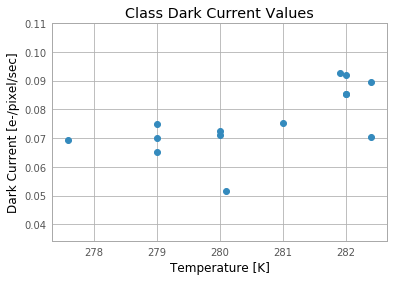

This plot shows the values for dark current at various temperatures and exposure times measured by the class.


In [85]:
#dark current below!
T4_6E450 = np.median(DT4_6E450_sb_exp)/450
T6E300 = np.median(DT6E300_sb_exp)/300
T6E600 = np.median(DT6E600_sb_exp)/600
T6E900 = np.median(DT6E900_sb_exp)/900
T7E400 = np.median(DT7E400_sb_exp)/400
T7E600 = np.median(DT7E600_sb_exp)/600
T7_1E600 = np.median(DT7_1E600_sb_exp)/600
T8E400 = np.median(DT8E400_sb_exp)/400
T8_9E300 = np.median(DT8_9E300_sb_exp)/300
T9E300 = np.median(DT9E300_sb_exp)/300
T9E600 = np.median(DT9E600_sb_exp)/600
T9E600_2 = np.median(DT9E600_2_sb_exp)/600
T9_4E300 = np.median(DT9_4E300_sb_exp)/300
T9_4E400 = np.median(DT9_4E400_sb_exp)/400
#above values in ADU

darkcurrent = [T4_6E450,T6E300,T6E600,T6E900,T7E400,T7E600,T7_1E600,T8E400,
               T8_9E300,T9E300,T9E600,T9E600_2,T9_4E300,T9_4E400]
darkcurrent = np.array(darkcurrent)*gain
#gain converts ADU -> e 

T = [4.6+273, 6+273, 6+273, 6+273, 7+273, 7+273, 7.1+273, 8+273, 8.9+273, 9+273, 9+273, 9+273, 9.4+273, 9.4+273]
T = np.array(T) 

plt.scatter(T,darkcurrent)
plt.title("Class Dark Current Values")
plt.xlabel("Temperature [K]")
plt.ylabel("Dark Current [e-/pixel/sec]")
plt.show()
print("This plot shows the values for dark current at various temperatures",
     "and exposure times measured by the class.")

Now, a curve can be fit to the data in an attempt to determine the coefficients related to dark current. An exponential function is defined with inputs T = temperature values (K), A = constant (ADU/pixel/s), and Eg = bandgap energy (eV). Initial estimates for the coefficients are guesses that fit the data decently when plotted. The estimated curve fit is plotted alongside the original data.

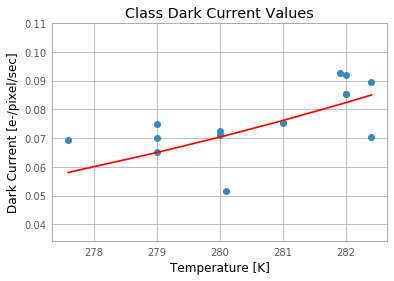

This plot shows the values for dark current at various temperatures and exposure times measured by the class, along with an estimated curve fit.


In [84]:
k = 8.6173e-5 #[eV/K]

def func2(T,A,Eg):
    return A*T**(3/2)*np.exp(-Eg/(2*k*T))

A0 = 15000
Eg0 = 1

plt.scatter(T,darkcurrent)
plt.plot(T,func2(T,A0,Eg0),'r')
plt.title("Class Dark Current Values")
plt.xlabel("Temperature [K]")
plt.ylabel("Dark Current [e-/pixel/sec]")
plt.show()
print("This plot shows the values for dark current at various temperatures",
     "and exposure times measured by the class, along with an estimated curve fit.")

Now the curve fit can be optimized. The optimized coefficients A and Eg are represented by "coeffs2", and "fiterr2" represents the error in each of these optimized values. The coefficients and fit error and are calculated with the curve_fit function applied to our exponential function defined above, using the mean and variance data and previously estimated coefficients. The curve-fit line is plotted against the original data once again, this time with optimized coefficients. The error in each variable is printed, defined as the square root of the respective values provided by curve_fit in fiterr2.

A=274.85533107, Eg=0.805289721425
Error in A = 1738.81178105
Error in Eg = 0.306236423592


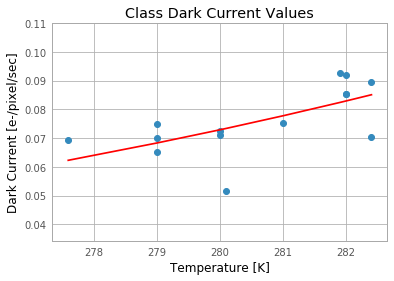

This plot shows the values for dark current at various temperatures and exposure times measured by the class, along with an optimized curve fit.


In [83]:
coeffs2, fiterr2 = curve_fit(func2, T, darkcurrent, p0=(A0,Eg0))

print ("A=%s, Eg=%s" % (coeffs2[0], coeffs2[1]))
A_error = np.sqrt(fiterr2[0][0])
Eg_error = np.sqrt(fiterr2[1][1])
print("Error in A =",A_error)
print("Error in Eg =",Eg_error)

plt.scatter(T,darkcurrent)
plt.plot(T,func2(T,*coeffs2),'r')
plt.title("Class Dark Current Values")
plt.xlabel("Temperature [K]")
plt.ylabel("Dark Current [e-/pixel/sec]")
plt.show()
print("This plot shows the values for dark current at various temperatures",
     "and exposure times measured by the class, along with an optimized curve fit.")

# Summary

Over two days, biases, flats, and darks were taken. On day one, ten bias frames were taken, and ten flat frames at each lamp brightness setting of 75, 190, and 255, each with exposure time of 1 second. The read noise in ADU was determined using the average of the standard deviation of each pixel within the set of biases. It was found to be 19.45 ADU. A composite, average bias frame was subtracted from each flat frame. The average of the mean and variance of each pixel in the each set of bias-corrected flat frames was taken and plotted. The gain was calculated as the slope of a line curve-fit to this data. It was found to be 0.4 e-/ADU. The read noise was then converted from ADU to electrons using the gain. This was found to be 7.79 e-. 

On day two, thirty bias frames were taken, and two dark frames were taken by each group in the class at temperatures ranging from 4.6 - 9.4 C, and exposure times ranging from 300 - 900 seconds, for a total of 12 frames. A composite, average bias frame was subtracted from the dark frames, and the median pixel value of these bias-correceted darks is the dark noise. The dark current in e-/pixel/second was found for each dark frame by dividing the dark noise by the exposure time and multiplying by the gain. A curve-fit line using the exponential dark current fuction allowed for the observational values of dark current coefficients to be measured, $A$ (a constant) and $E_g$ (the bandgap of silicon). $A$ was found to be 274.8 ADU/pixel/sec, and $E_g$ was found to be 0.805 eV. 

# Conclusion

The read noise value of 7.79 e- is not far from the expected value of around 10 e-, provided by Professor Meyer. The difference between these values is likely due largely to the relatively small amount of data points taken. Had there been more than 10 flat frames per set, perhaps closer to 100 frames each, the average of their means and variances would be more accurate. Had there been more sets of flats taken at a greater variety of lamp brightness levels, there would be more data points to which a curve could be more accurately fitted, providing a more accurate gain. The measured gain value of 0.4 e- is not far from the expected value of 0.5 e- provided by Professor Meyer. 

The read noise and gain of the OSU CCD can provide a good comparison. Its read noise is 5 e-, and its gain is 2.2-2.4 e-/ADU. The observed read noise value is quite close to that of the OSU CCD, but the gain is quite different. This can be accounted for in the full well depth -- the Angell CCD has a full well depth of 65,536, which is significantly smaller than the full well depth of the OSU CCD at around 107,000. 

The observed value of the bandgap of silicon was quite different from its known value, being 0.805 and 1.1 eV, respectively. This can be explained by the high variance in dark current values at similar temperatures. Had there been more dark frames taken at a greater variety of temperatures and exposure times, the curve fit and thus optimized coefficients would have likely been much more accurate.